In [9]:
import cv2
import matplotlib.pyplot as plt
import sys
import numpy as np
sys.path.append('..')
from stars import BH_stars_img
from telescope_simulator import TelescopeSimulator

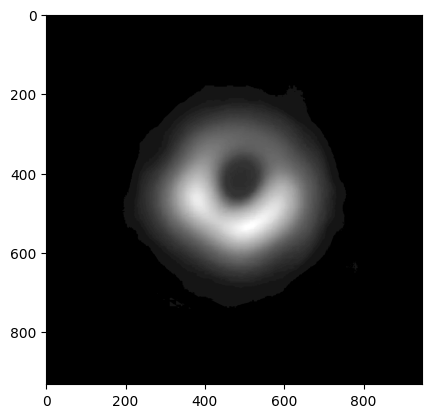

In [10]:
M87 = cv2.imread('M87_after.png', 0)
plt.imshow(M87, cmap='gray')

In [11]:
# img = BH_stars_img(BHs_path='tele_datasets/224/', BHs=M87, num_stars=100, num_BHs=1, stars_lower_size=64, stars_upper_size=75,
#                     BHS_lower_size=64, BH_upper_size=75, height=3072, width=3072, bg_color=0, shape='rect')
# img.stars_gen()
# img.BHs_gen()
# noise_BHs = img.add_noise(img.stars_BHs_img, radius=10)
# cv2.imwrite('out_put_M87.png', noise_BHs)
# # plt.imshow(img.stars_BHs_img, cmap='gray')
# # plt.show()
# img.txtGen(txt_path='labels.txt')

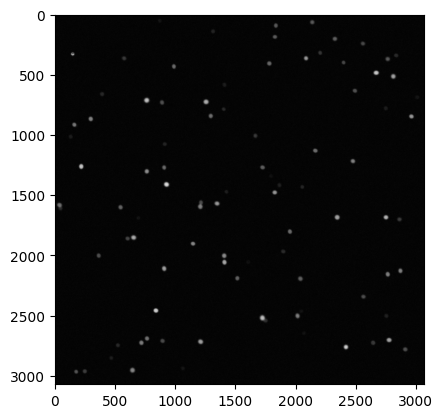

In [12]:
M87_out = cv2.imread('out_put_M87.png', 0)
plt.imshow(M87_out, cmap='gray')

In [13]:
angular_pixel_size_input_image = 1e-5

In [14]:
tele_config = dict(
    # physical parameters
    input_image = r"./stars/BHs.png", telescope_diameter_m = 6.5,
    telescope_focal_length_m = 131.4, angular_pixel_size_input_image = angular_pixel_size_input_image,
    wavelength = 100e-9, CCD_pixel_size = angular_pixel_size_input_image * 131.4 / 206265,
    CCD_pixel_count = 3072, show = False,
)

In [ ]:
tele_config['input_image'] = M87_out
show = False
telescope_simulator = TelescopeSimulator(**tele_config)
intensity_image = telescope_simulator.get_intensity(M87_out, show=show)
conv_image = telescope_simulator.get_convolved_image(M87_out, intensity_image, show=show)
output_img = telescope_simulator.generate_image(conv_image, show=show)
# output_img = telescope_simulator.generate_image(show=False)
output_img = output_img.astype(np.int64)